In [1]:
print("hello")

hello


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20.0, 10.0]

#read data
data=pd.read_csv("C:\Python\headbrain.csv")
print(data.shape)
data.head()

#Collecting values
x=data["head_size"].values
y=data["brain_weight"].values
#print (x)
#print(y)
#Calculate mean of x and y
mean_x=np.mean(x)
mean_y=np.mean(y)

print( "x Mean value: " , (mean_x))
print( "y Mean value: " ,mean_y)

#calculate m and c

l=len(x)
numerator=0
denominator=0
for i in range(l):
    numerator += ((x[i]-mean_x)*(y[i]-mean_y))
    denominator += (x[i]-mean_x)**2
m=numerator/denominator
c=mean_y-(m*mean_x)

  
#print (coefficients m,c)
print("m=", m)
print("c=", c)




(237, 4)
x Mean value:  3633.9915611814345
y Mean value:  1282.873417721519
m= 0.26342933948939945
c= 325.57342104944223


4847
2620


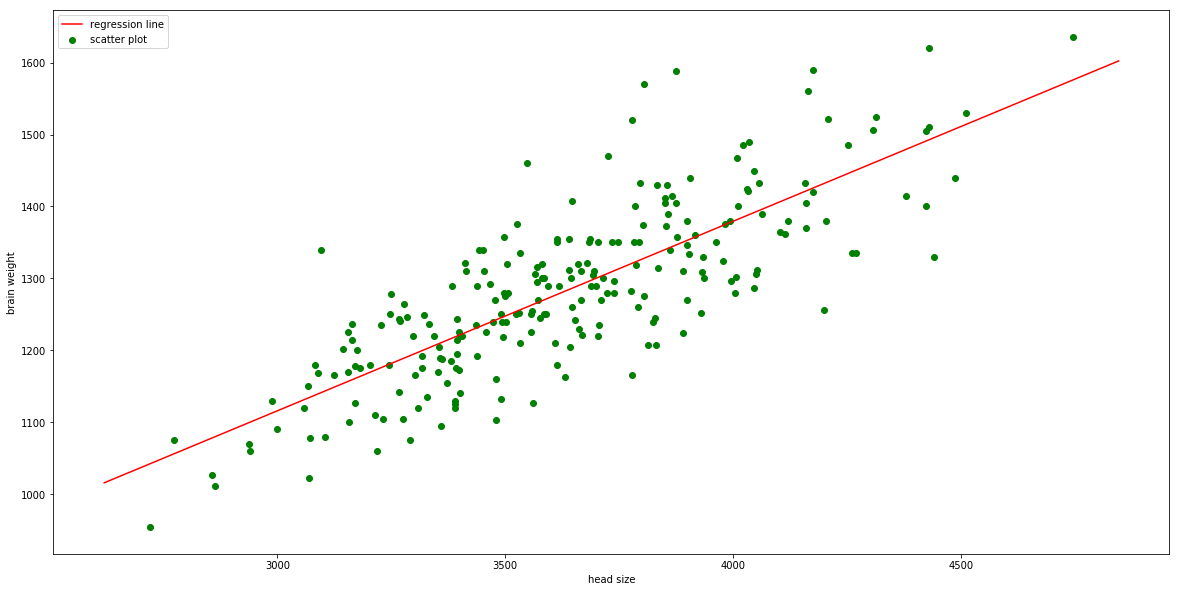

In [9]:
#plotting values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100

#plotting line
print(max_x)
print(min_x)

#Calculating line values for X and Y

X=np.linspace(min_x,max_x,1000)
Y= c + m * X

plt.plot(X,Y, color="red", label="regression line")

#plotting scatter points
plt.scatter(x,y, c="green", label="scatter plot")
plt.xlabel("head size")
plt.ylabel("brain weight")
plt.legend()
plt.show()

In [10]:
#Calculating R2
ss_t = 0
ss_r = 0
for i in range(l):
    y_pred=c + m * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [11]:
#Using Sci kit library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=x.reshape(l,1)

#creating model
reg=LinearRegression()

#Fitting the training Data
reg=reg.fit(x,y)
#Prediction Data
y_predict=reg.predict(x)

#Calculating rmse

mse=mean_squared_error(y,y_predict)
remse=np.sqrt(mse)
r2_square=reg.score(x,y)
print(np.sqrt(mse))
print(r2_square)


72.1206213783709
0.639311719957
